In [ ]:
from sklearn.datasets import make_blobs as mb
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

In [131]:
# Generating 2-D blobs with pre-defined centres, number of samples and cluster standard deviation can be controlled
def generate_rawdata( n_samples, cluster_std ):
    centers = [[-1,1], [1,-1], [1,1]]
    X,y = mb(n_samples= n_samples, n_features = 2, centers = centers, cluster_std = cluster_std)
    plt.scatter(X[:,0], X[:,1])
    plt.title('Raw Data')
    plt.show()
    return X
    
    
def dbscan_cluster( X, eps, min_samples ):
    
    Xnew = StandardScaler().fit_transform(X)
    db = DBSCAN(eps = eps, min_samples = min_samples).fit(Xnew)
           
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    
    cdict = {-1: 'red', 0: 'purple', 1: 'blue', 2: 'green'}
    scatter_x = X[:,0]
    scatter_y = X[:,1]
    group = db.labels_
    labels = {-1:'Noise'}
    for i in range(n_clusters_):
        labels[i] = 'Cluster ' + str(i+1)
    
    fig, ax = plt.subplots()
    for g in np.unique(group):
        ix = np.where(group == g)
        ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = labels[g], s = 10)
    ax.legend()
    ax.set_title('DBSCAN clustering')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.show()
    

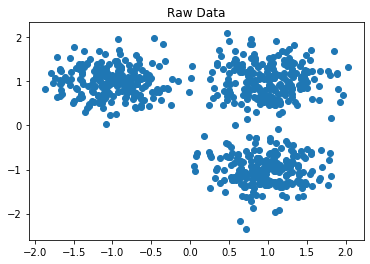

Estimated number of clusters: 3
Estimated number of noise points: 80


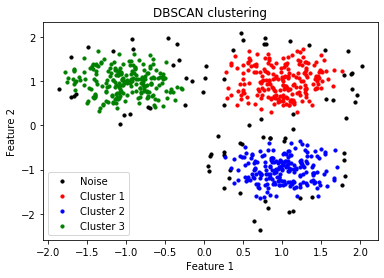

In [35]:
X = generate_rawdata( n_samples = 700, cluster_std = 0.35)
dbscan_cluster(X = X, eps =  0.2, min_samples = 10)

#### How to chose a proper epsilon
https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

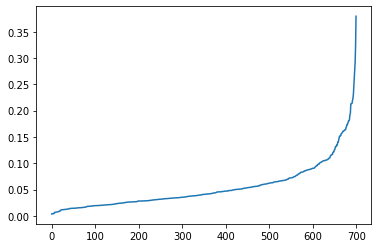

In [36]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [39]:
import pandas as pd

In [45]:
data = pd.read_csv('clusterdata.txt', sep = '\t', header = None)
data.columns = [ 'x1', 'x2', 'y']

In [46]:
data.head()

,x1,x2,y
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1


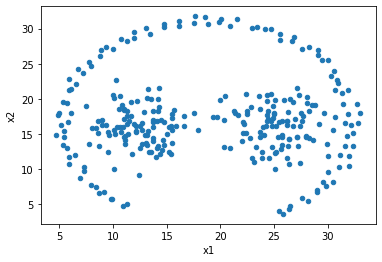

In [47]:
data.plot( x= 'x1', y = 'x2', kind = 'scatter' )

In [170]:
newData = data[['x1','x2']]
X = newData.to_numpy()

Xnew = StandardScaler().fit_transform(X)
db = DBSCAN(eps = 0.2, min_samples = 10).fit(Xnew)
           
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 195


Estimated number of clusters: 2
Estimated number of noise points: 122


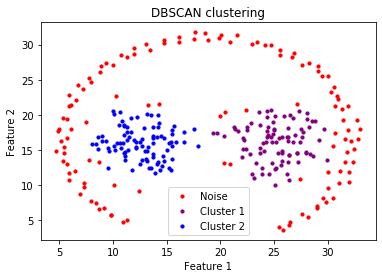

In [171]:
dbscan_cluster(X, eps = 0.28, min_samples= 10)

In [199]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=800, shuffle=True, noise=0.08, random_state=None, factor=0.5)

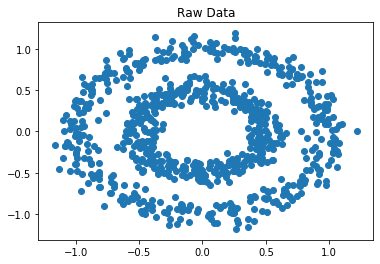

In [200]:
plt.scatter(X[:,0], X[:,1])
plt.title('Raw Data')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 5


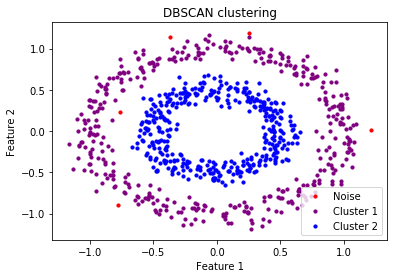

In [201]:
dbscan_cluster(X, 0.25, 7)